# Import the necessary libraries

In [59]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, cross_validate

# load tha data

In [60]:
# Load the breast cancer dataset
data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Exploratory data analysis

In [61]:
# dataframe info (569 rows, 31 columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [62]:
# dataframe data types (looks like all columns are float64 except for the target column)
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [63]:
# looks like no missing values
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [64]:
# look at "target" distribution
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

# no need to clean up the data, so we can move on to the next step

# Apply the classification models 

In [65]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [66]:
# Apply PCA to retain 95% of variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

In [67]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Logistic Regression

In [68]:
# Initialize and train the Logistic Regression model
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Print classification metrics
print("Classification Report for Logistic Regression:\n")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Logistic Regression:\n")
print(cm)

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        43
      benign       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix for Logistic Regression:

[[42  1]
 [ 1 70]]


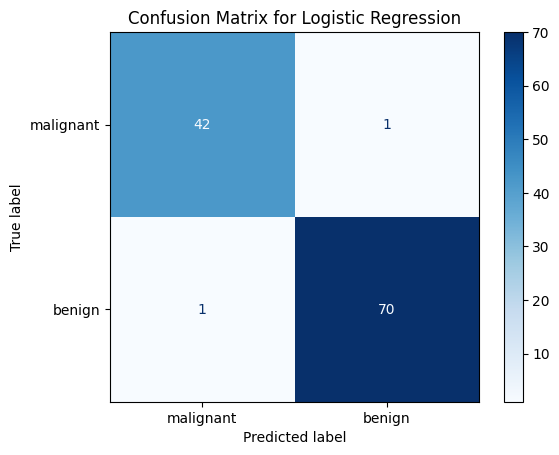

In [69]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Decision Tree Classifier

In [70]:
# Initialize and train the Decision Tree model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Print classification metrics
print("Classification Report for Decision Tree:\n")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Decision Tree:\n")
print(cm)

Classification Report for Decision Tree:

              precision    recall  f1-score   support

   malignant       0.89      0.98      0.93        43
      benign       0.99      0.93      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion Matrix for Decision Tree:

[[42  1]
 [ 5 66]]


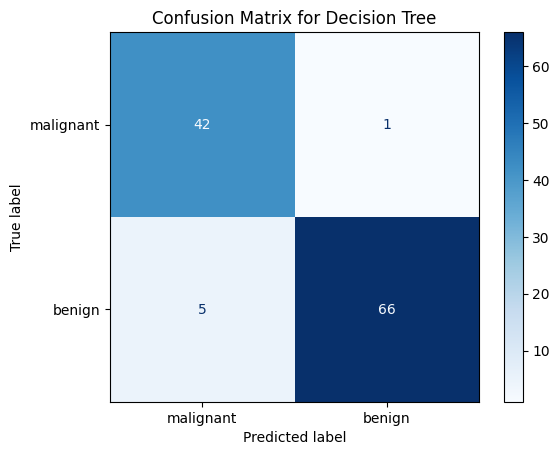

In [71]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# Random Forest Classifier

In [72]:
# Initialize and train the Random Forest model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Print classification metrics
print("Classification Report for Random Forest:\n")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Random Forest:\n")
print(cm)

Classification Report for Random Forest:

              precision    recall  f1-score   support

   malignant       0.93      0.93      0.93        43
      benign       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion Matrix for Random Forest:

[[40  3]
 [ 3 68]]


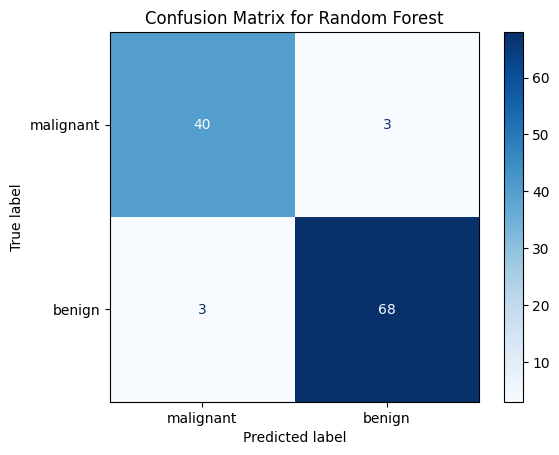

In [73]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Support Vector Machine (SVM)

In [74]:
# Initialize and train the SVM model
clf = SVC()
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Print classification metrics
print("Classification Report for Support Vector Machine:\n")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Support Vector Machine:\n")
print(cm)

Classification Report for Support Vector Machine:

              precision    recall  f1-score   support

   malignant       0.98      0.95      0.96        43
      benign       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix for Support Vector Machine:

[[41  2]
 [ 1 70]]


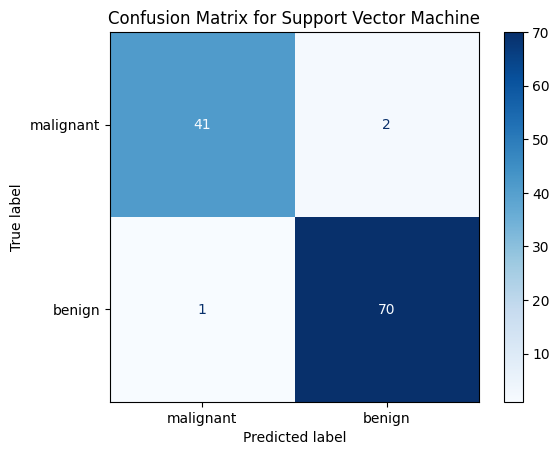

In [75]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Support Vector Machine')
plt.show()

# Apply Cross-Validation

In [76]:
clf = LogisticRegression(max_iter=10000)

# Apply cross-validation
cv_results = cross_validate(clf, X_pca, y, cv=5, scoring='accuracy', return_train_score=False)

# Print average accuracy
print(f"Average Accuracy: {cv_results['test_score'].mean():.4f}")

Average Accuracy: 0.9789


In [77]:
clf = DecisionTreeClassifier()

# Apply cross-validation
cv_results = cross_validate(clf, X_pca, y, cv=5, scoring='accuracy', return_train_score=False)

# Print average accuracy
print(f"Average Accuracy: {cv_results['test_score'].mean():.4f}")

Average Accuracy: 0.9156


In [78]:
clf = RandomForestClassifier()

# Apply cross-validation
cv_results = cross_validate(clf, X_pca, y, cv=5, scoring='accuracy', return_train_score=False)

# Print average accuracy
print(f"Average Accuracy: {cv_results['test_score'].mean():.4f}")

Average Accuracy: 0.9472


In [79]:
clf = SVC()

# Apply cross-validation
cv_results = cross_validate(clf, X_pca, y, cv=5, scoring='accuracy', return_train_score=False)

# Print average accuracy
print(f"Average Accuracy: {cv_results['test_score'].mean():.4f}")

Average Accuracy: 0.9754
